In [1]:
import thinkstats2
import thinkplot
import numpy as np
import nsfg

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Given a list of values, there are several ways to count the frequency of each value.

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

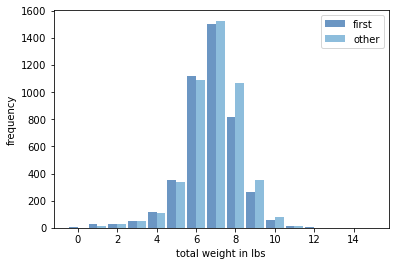

<Figure size 576x432 with 0 Axes>

In [3]:
import thinkstats2
import thinkplot
import numpy as np
import nsfg
preg = nsfg.ReadFemPreg()

# filter out not live baby
live = preg[preg.outcome == 1]

# further extracting
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Investigate whether first babies are lighter or heavier than others

## Round the data down
firsts_wgt = np.floor(firsts.totalwgt_lb)
others_wgt = np.floor(others.totalwgt_lb)

## Make histogram
first_hist = thinkstats2.Hist(firsts_wgt, label='first')
other_hist = thinkstats2.Hist(others_wgt, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='total weight in lbs', ylabel='frequency')

In [7]:
# Cohen's Effect
import math
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean() # set out means for pandas sequences.
    
    var1 = group1.var() # find out variances
    var2 = group2.var()
    
    n1, n2 = len(group1), len(group2)  # Size included in computation
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2) # compute Pooled Variance
    
    d = diff / math.sqrt(pooled_var)  # Cohen  Difference
    
    return d

In [9]:
print(f"The cohen's effect of the weight of others and firsts baby: {CohenEffectSize(firsts_wgt, others_wgt)}")

# Compare the difference to pregnancy length
print(f"The cohen's effect of the pregnancy length of others and firsts baby: {CohenEffectSize(firsts.prglngth, others.prglngth)}")

The cohen's effect of the weight of others and firsts baby: -0.10678966649967156
The cohen's effect of the pregnancy length of others and firsts baby: 0.028879044654449883


For the next few exercises, we'll load the respondent file:

In [17]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [10]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

Hist({14: 1160, 12: 658, 11: 647, 13: 623, 9: 607, 8: 606, 7: 583, 6: 559, 10: 468, 5: 445, 4: 421, 2: 301, 1: 299, 3: 266})


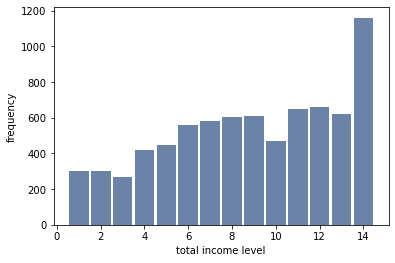

<Figure size 576x432 with 0 Axes>

In [27]:
import thinkstats2
import thinkplot

# make histogram
hist = thinkstats2.Hist(resp.totincr)
print(hist)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='total income level', ylabel='frequency')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

Hist({30: 292, 22: 287, 23: 282, 31: 278, 32: 273, 37: 271, 24: 269, 25: 267, 21: 267, 36: 266, 35: 262, 29: 262, 26: 260, 20: 258, 33: 257, 38: 256, 40: 256, 27: 255, 34: 255, 43: 253, 28: 252, 41: 250, 19: 241, 18: 235, 44: 235, 17: 234, 16: 223, 15: 217, 42: 215, 39: 215})


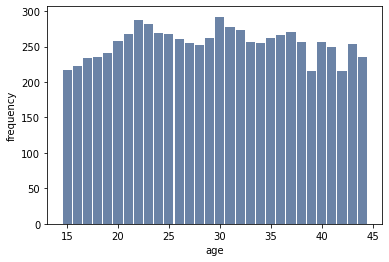

<Figure size 576x432 with 0 Axes>

In [13]:
import thinkstats2
import thinkplot

# Make histogram
hist = thinkstats2.Hist(resp.age_r)
print(hist)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='age', ylabel='frequency')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

Hist({2: 1826, 3: 1740, 1: 1716, 0: 942, 4: 906, 5: 313, 6: 118, 7: 78, 8: 4})


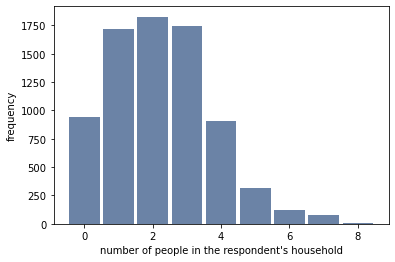

<Figure size 576x432 with 0 Axes>

In [14]:
import thinkstats2
import thinkplot

# Make histogram
hist = thinkstats2.Hist(resp.numfmhh)
print(hist)
thinkplot.Hist(hist)
thinkplot.Show(xlabel="number of people in the respondent's household", ylabel='frequency')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

Hist({0: 3230, 2: 1603, 1: 1519, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 10: 3, 9: 2, 22: 1, 16: 1})


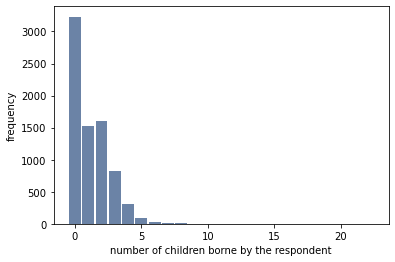

<Figure size 576x432 with 0 Axes>

In [15]:
import thinkstats2
import thinkplot

# Make histogram
hist = thinkstats2.Hist(resp.parity)
print(hist)
thinkplot.Hist(hist)
thinkplot.Show(xlabel="number of children borne by the respondent", ylabel='frequency')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [21]:
hist = thinkstats2.Hist(resp.parity)
print(f"The largest parities: {hist.Largest(1)[0][0]}")

The largest parities: 22


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

Hist({0: 515, 2: 267, 1: 229, 3: 123, 4: 19, 5: 5, 8: 1, 7: 1})


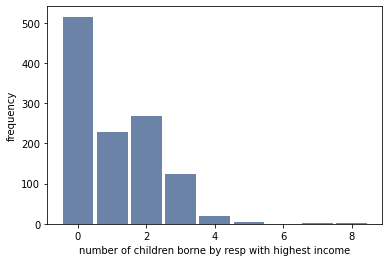

<Figure size 576x432 with 0 Axes>

In [17]:
import thinkstats2
import thinkplot

highest_inc = resp[resp.totincr == 14]

# Make histogram
hist = thinkstats2.Hist(highest_inc.parity)
print(hist)
thinkplot.Hist(hist)
thinkplot.Show(xlabel="number of children borne by resp with highest income", ylabel='frequency')

Find the largest parities for high income respondents.

In [20]:
hist = thinkstats2.Hist(highest_inc.parity)
print(f"The largest parities for high income resp: {hist.Largest(1)[0][0]}")

The largest parities for high income resp: 8


Compare the mean <tt>parity</tt> for high income respondents and others.

In [28]:
from math import sqrt
highest_inc = resp[resp.totincr == 14]
others = resp[resp.totincr !=14]

highest_inc_mean = highest_inc.parity.mean()
others_mean = others.parity.mean()
diff = sqrt((highest_inc_mean - others_mean)**2)
print(f'Mean difference of parity = {diff}')

Mean difference of parity = 0.17371374470099532


In [24]:
print(f"Cohen's effect = {CohenEffectSize(highest_inc.parity, others.parity)}")

Cohen's effect = -0.1251185531466061
